In [1]:
import numpy as np
import h5py

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.set_cmap('jet')

<Figure size 432x288 with 0 Axes>

#### Try with not paired data

In [3]:
# hw_r = h5py.File('/data/cees/gegewen/cs231n_project_data/inj_S_P_data.hdf5', 'r')
# hw_r = h5py.File('/data/cees/gegewen/cs231n_project_data/inj_S_P_data_v3.hdf5', 'r')
hw_r = h5py.File('/data/cees/gegewen/cs231n_project_data/inj_S_P_data_test.hdf5', 'r')
data = np.array(hw_r.get('inj_S_P_data'))
hw_r.close()

print(data.shape)

(128, 128, 4, 5, 100, 3)


shape: (128, 128, 4, 42, 50, 3) <br>
128x128 image <br>
4 time steps: 50, 100, 150, 200 days <br>
50 well locations <br>
42 perm fields (same distribution) <br>
3:\[w, S, p\], w: well location map <br>


### !!! For test data only

In [4]:
data1 = np.transpose(data, (3,4,2,0,1,5))
print(data1.shape)

(5, 100, 4, 128, 128, 3)


In [13]:
data_a = np.repeat(data1,5,axis=0)
print(data_a.shape)

(25, 100, 4, 128, 128, 3)


In [20]:
data_b = np.repeat(data1[:,np.newaxis,...],5,axis=1)
print(data_b.shape)

(5, 5, 100, 4, 128, 128, 3)


In [22]:
data_c = data_b.transpose([1,0,2,3,4,5,6]).reshape(25,100,4,128,128,3)
print(data_c.shape)

(25, 100, 4, 128, 128, 3)


In [23]:
data_2 = np.concatenate((data_a[...,np.newaxis], data_c[...,np.newaxis]), axis=6)
print(data_2.shape)

(25, 100, 4, 128, 128, 3, 2)


In [24]:
mask = np.ones(25, dtype=bool)
print(mask.shape)
mask[[0,6,12,18,24]]=False

(25,)


In [25]:
data_3 = data_2[mask,...]
print(data_3.shape)

(20, 100, 4, 128, 128, 3, 2)


In [34]:
data_shuffle = data_3.reshape(20*100*4,128,128,3,2)
print(data_shuffle.shape)

(8000, 128, 128, 3, 2)


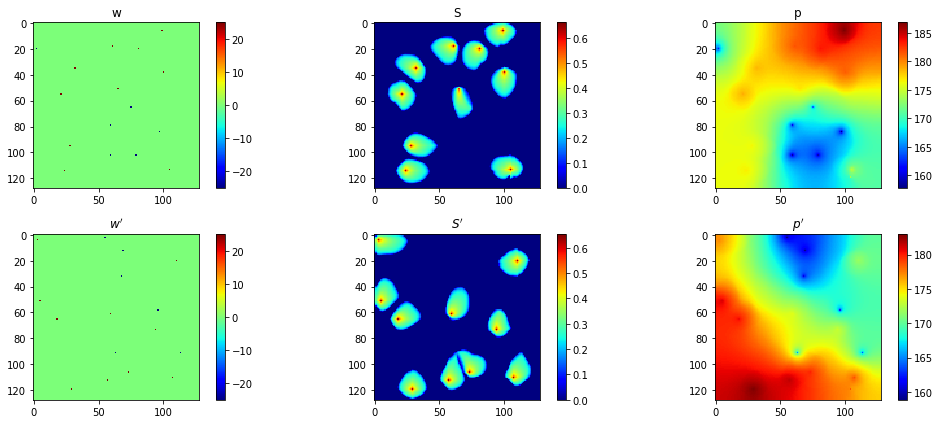

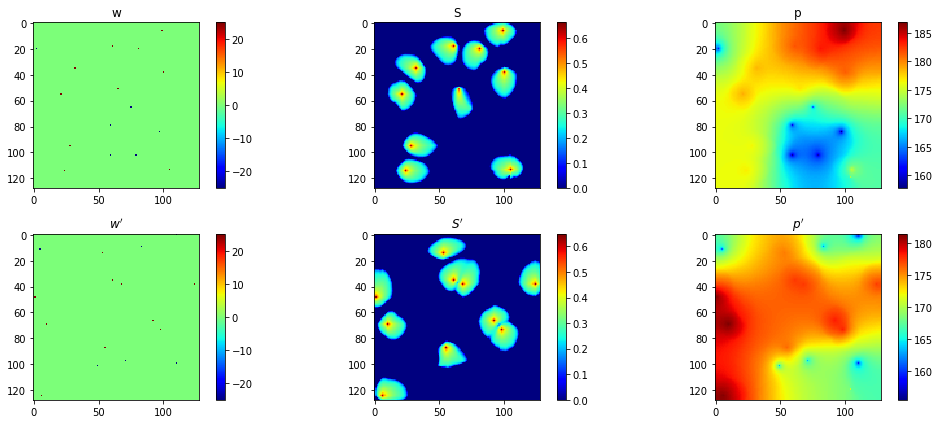

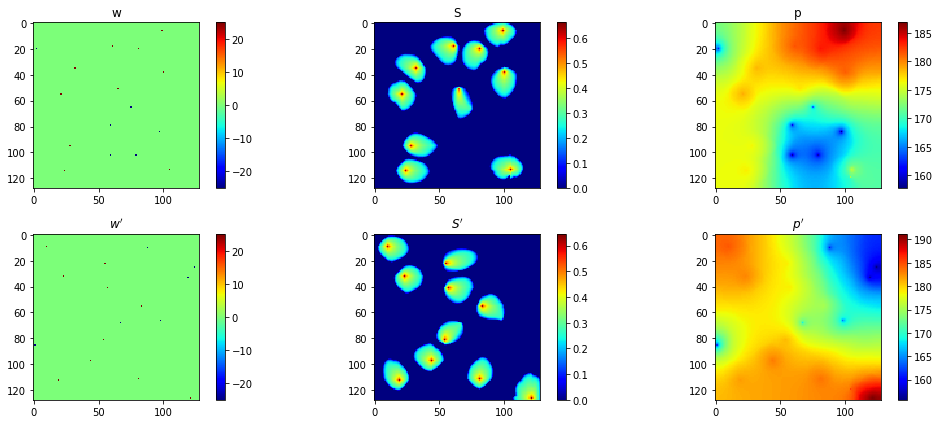

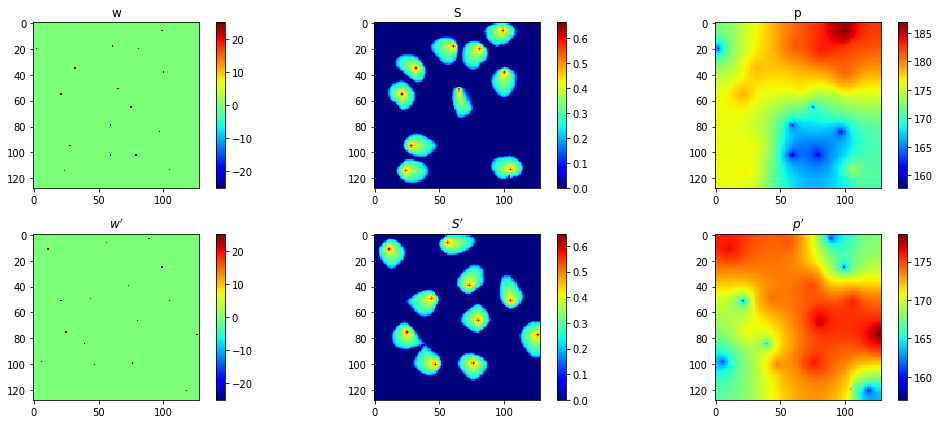

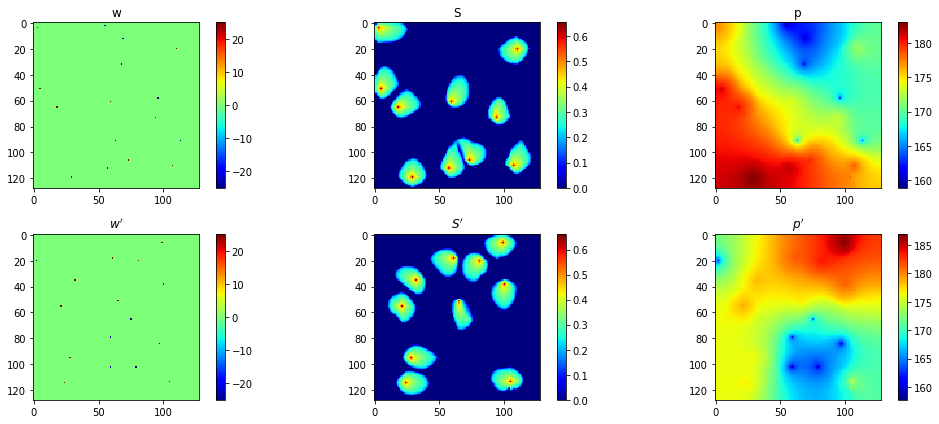

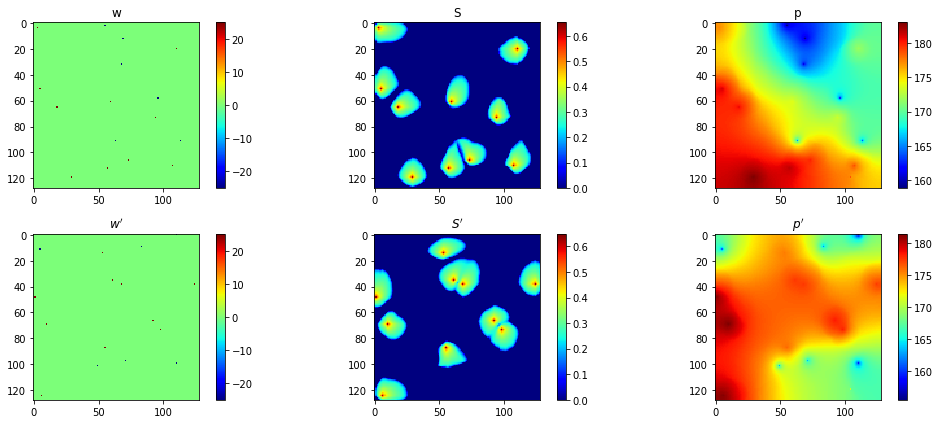

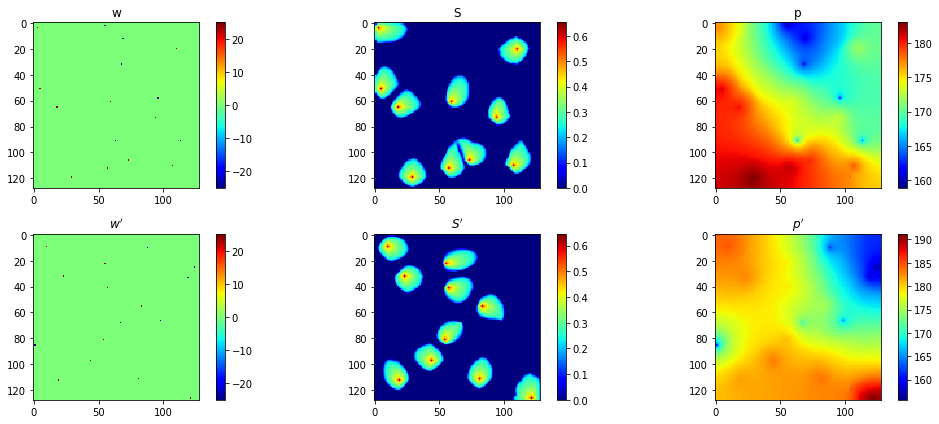

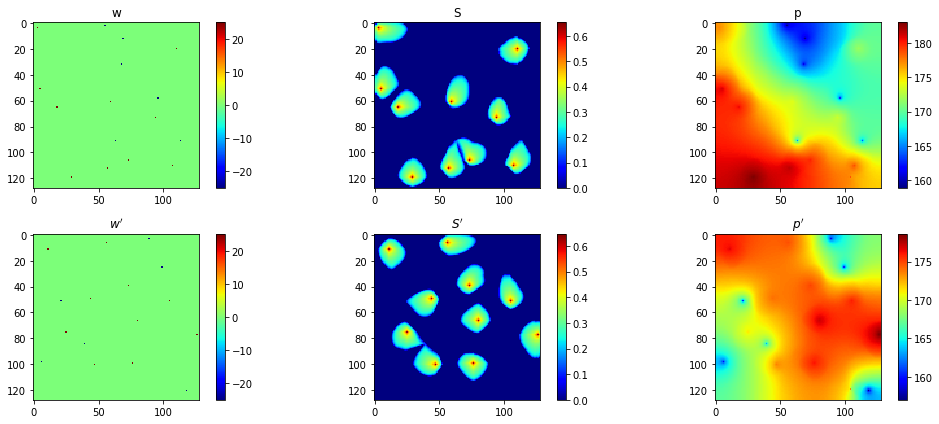

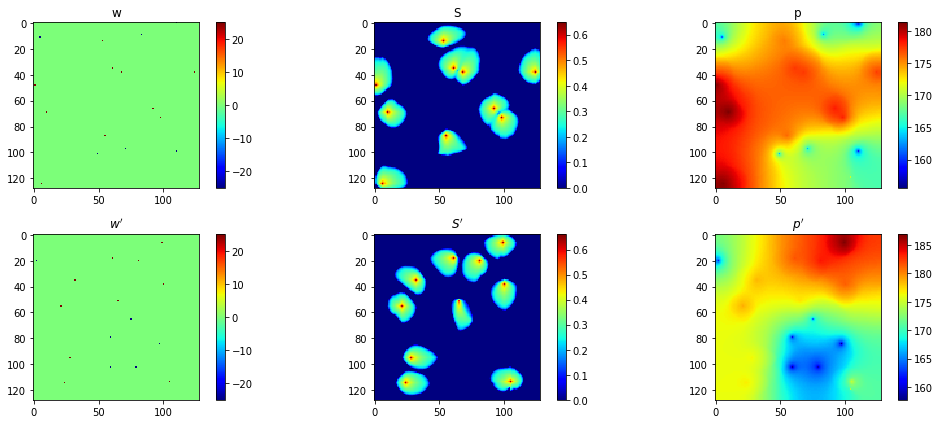

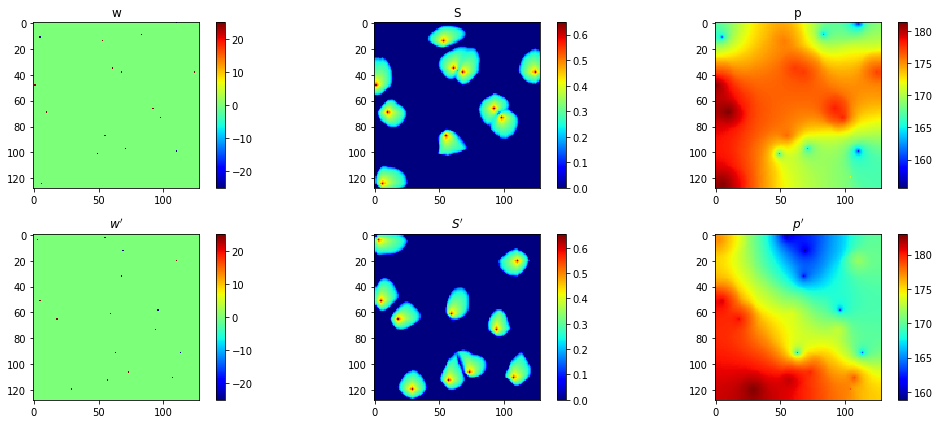

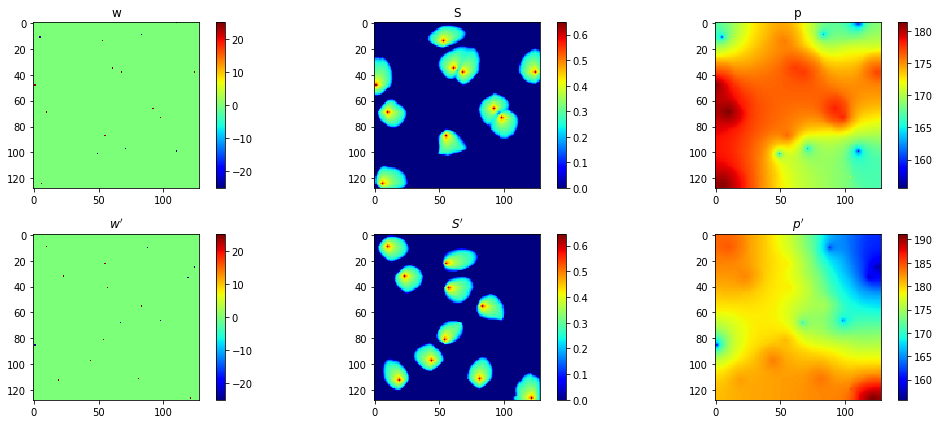

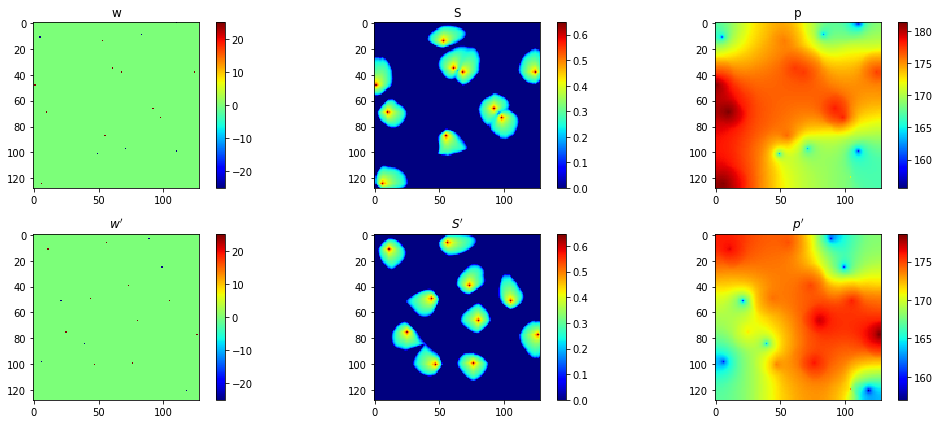

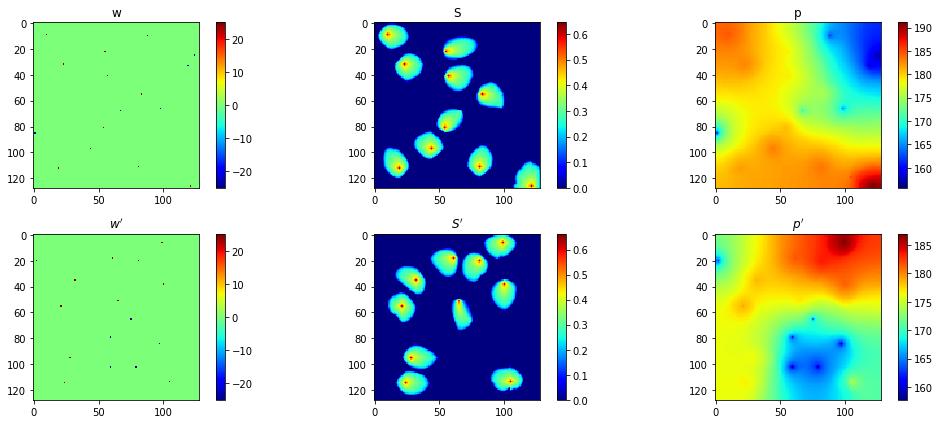

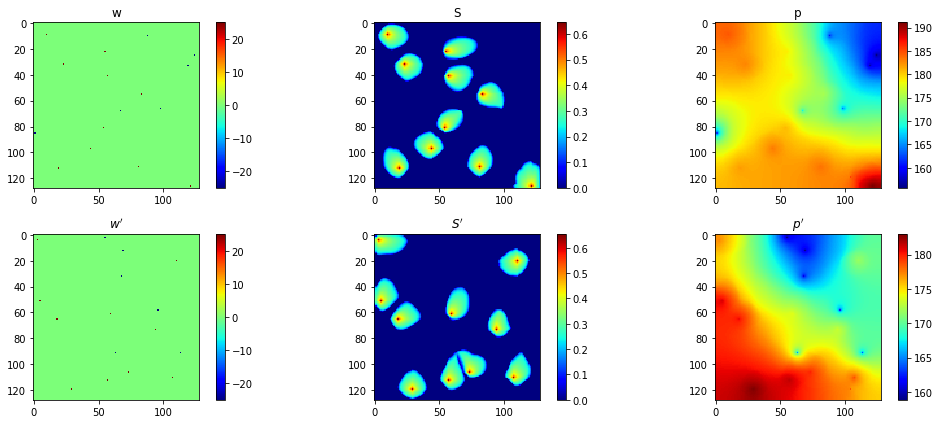

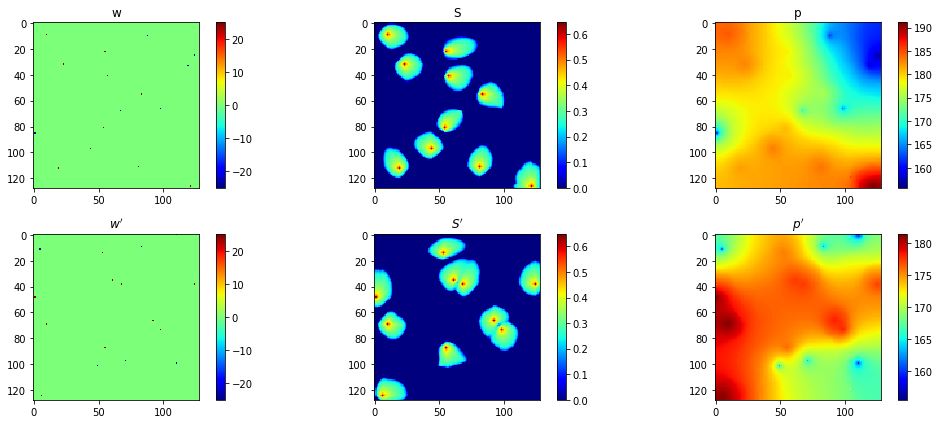

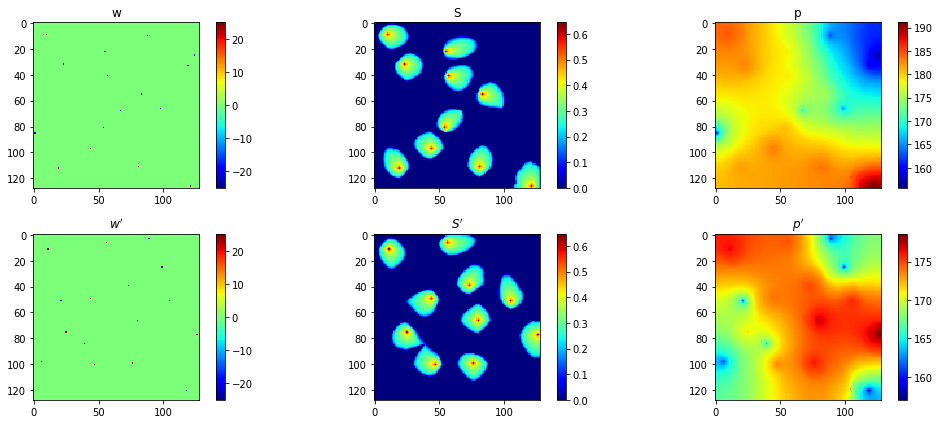

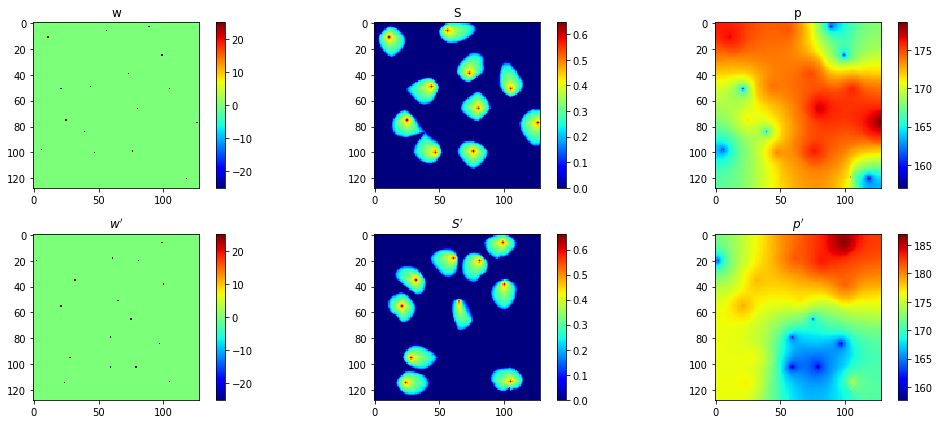

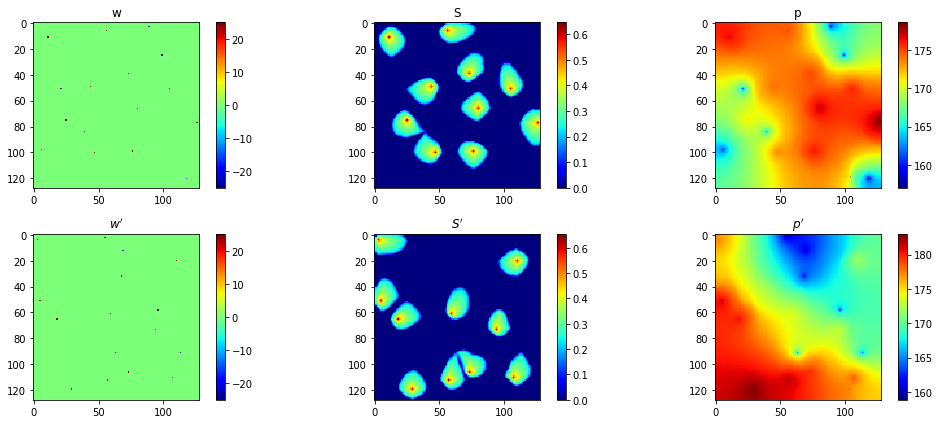

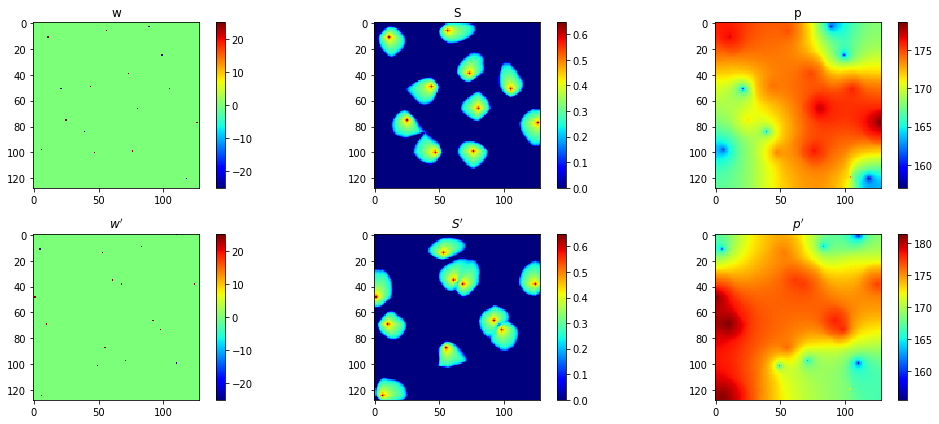

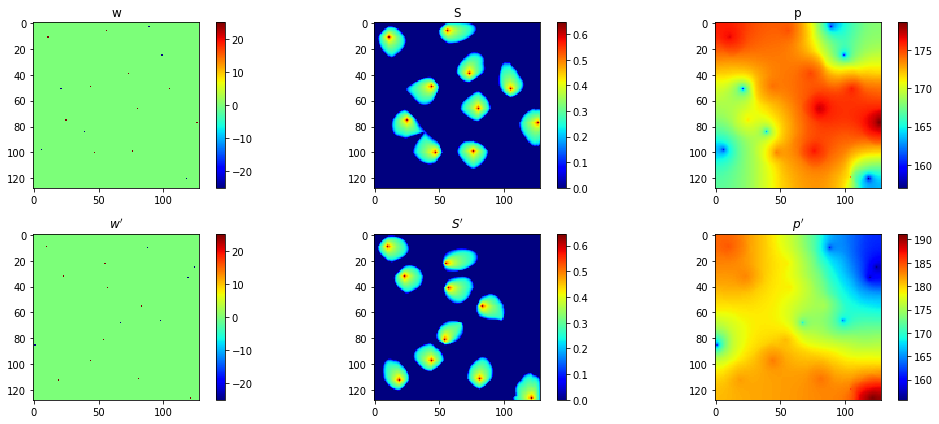

In [31]:
n_plot_train = 20

for k in range(n_plot_train):
    plt.figure(figsize=(15, 6))
    
    plt.subplot(2,3,1)
    plt.title('w')
    plt.imshow(data_3[k,0,0,...,0, 0])
#     plt.clim([0, 0.6])
    plt.colorbar(fraction=0.046)
    
    plt.subplot(2,3,2)
    plt.title('S')
    plt.imshow(data_3[k,0,0,...,1, 0])
#     plt.clim([0, 0.6])
    plt.colorbar(fraction=0.046)
    
    plt.subplot(2,3,3)
    plt.title('p')
    plt.imshow(data_3[k,0,0, ...,2, 0])
#     plt.clim([0, 0.6])
    plt.colorbar(fraction=0.046)
    
    plt.subplot(2,3,4)
    plt.imshow(data_3[k,0,0,...,0, 1])
    plt.title('$w^{\prime}$')
#     plt.clim([0, 0.6])
    plt.colorbar(fraction=0.046)
    
    plt.subplot(2,3,5)
    plt.imshow(data_3[k,0,0,...,1, 1]) 
    plt.title('$S^{\prime}$')
    plt.colorbar(fraction=0.046)
    
    plt.subplot(2,3,6)
    plt.imshow(data_3[k,0,0,...,2, 1])
    plt.title('$p^{\prime}$')
    plt.colorbar(fraction=0.046)
    
    plt.tight_layout()
#     plt.savefig("figs/" + case_string + model_string + "_train_results_%d_%dtrain_%depoch.pdf"%(k, train_nr, epoch), format='pdf')
    plt.show()


### !!! For Training data only

In [ ]:
data1 = np.transpose(data, (4,3,2,0,1,5))
print(data1.shape)

In [ ]:
shuffle_ind_0 = np.random.permutation(data1.shape[0])
data1_shuffle = data1[shuffle_ind_0, ...]
data2 = np.concatenate((data1[...,np.newaxis], data1_shuffle[...,np.newaxis]),axis=6)
print(data2.shape)

In [ ]:
data3 = data2.reshape(50*42*4, 128,128,3,2)
print(data3.shape)

In [ ]:
shuffle_ind = np.random.permutation(data3.shape[0])
data_shuffle = data3[shuffle_ind, ...]

### Check pressure and well control range

In [35]:
# data[3]: [w, S, p] => [0, 1, 2]

# pressure
print(np.max(data_shuffle[:,:,:,2,:]))
print(np.min(data_shuffle[:,:,:,2,:]))


# well
print(np.max(data_shuffle[:,:,:,0,:]))
print(np.min(data_shuffle[:,:,:,0,:]))

196.7027
153.4091
100.0
-100.0


### Remove the bad data

In [ ]:
a = data_shuffle[:,:,:,2,:]

In [ ]:
print(a.shape)

In [ ]:
b = np.zeros((8400,))
for i in range(a.shape[0]):
    if np.max(a[i,...])>=250:
        b[i] = 1
print(b.sum())

In [ ]:
c = np.argwhere(b)

In [ ]:
print(c)

In [ ]:
for i in range(len(c)):
    plt.figure()
    plt.subplot(121)
    plt.imshow(a[c[i], :,:, 0].reshape(128,128))
    plt.colorbar(fraction=0.046)
    plt.subplot(122)
    plt.imshow(a[c[i], :,:, 1].reshape(128,128))
    plt.colorbar(fraction=0.046)

In [ ]:
print(b)

In [ ]:
mask = np.ones((8400,), dtype=bool)
print(mask.shape)

mask[c] = False
data_shuffle_selected = data_shuffle[mask,...]
print(data_shuffle_selected.shape)

### If there is no bad data

In [37]:
data_shuffle_selected = data_shuffle

### Data normalization

In [38]:
# pressure
print(np.max(data_shuffle_selected[:,:,:,2,:]))
print(np.min(data_shuffle_selected[:,:,:,2,:]))


# well
print(np.max(data_shuffle_selected[:,:,:,0,:]))
print(np.min(data_shuffle_selected[:,:,:,0,:]))

196.7027
153.4091
100.0
-100.0


In [39]:
max_p = 225 # earlier 200
min_p = 150
diff_p = max_p - min_p
max_w = 100 # absolute value
min_w = 0
diff_w = max_w - min_w

In [40]:
data_shuffle_selected[...,2,:] = (data_shuffle_selected[...,2,:] - min_p) / diff_p
data_shuffle_selected[...,0,:] = (data_shuffle_selected[...,0,:] - min_w) / diff_w

In [41]:
print(np.max(data_shuffle_selected[:,:,:,2,:]))

0.6227026666666666


 #### Train/test split

In [42]:
num_train = 0
num_eval = 8000

data_train = data_shuffle_selected[:num_train,...]
data_eval = data_shuffle_selected[num_train:,...]

print(data_train.shape)
print(data_eval.shape)

(0, 128, 128, 3, 2)
(8000, 128, 128, 3, 2)


In [43]:
case_name = 'horizontal_16w_fix_perm_test'

hw_w = h5py.File('/data/cees/zjin/cs231n/project/var-unet/data/' + case_name + '.hdf5', 'w')
hw_w.create_dataset('data_train', data = data_train)
hw_w.create_dataset('data_eval', data = data_eval)
hw_w.close()

## Augment data

In [ ]:
print(data_shuffle.shape)

In [ ]:
data_shuffle_inv = data_shuffle[...,::-1]
print(data_shuffle_inv.shape)

In [ ]:
# check augmented data
k = 1
plt.figure(figsize=(12,12))

plt.subplot(221)
plt.imshow(data_shuffle[k,...,1,0])

plt.subplot(222)
plt.imshow(data_shuffle[k,...,1,1])

plt.subplot(223)
plt.imshow(data_shuffle_inv[k,...,1,0])

plt.subplot(224)
plt.imshow(data_shuffle_inv[k,...,1,1])

In [ ]:
data_aug = np.concatenate((data_shuffle, data_shuffle_inv),axis=0)
print(data_aug.shape)

aug_shuffle_ind = np.random.permutation(data_aug.shape[0])
data_aug_shuffle = data_aug[aug_shuffle_ind, ...]
print(data_aug_shuffle.shape)

 #### Train/test split for augmented data

In [ ]:
num_train = 1800
num_eval = 200

data_aug_train = data_aug_shuffle[:num_train,...]
data_aug_eval = data_aug_shuffle[num_train:,...]

print(data_aug_train.shape)
print(data_aug_eval.shape)

In [ ]:
case_name = 'horizontal_16w'

hw_w = h5py.File('/data/cees/zjin/cs231n/project/var-unet/data/' + case_name + '_aug.hdf5', 'w')
hw_w.create_dataset('data_train', data = data_aug_train)
hw_w.create_dataset('data_eval', data = data_aug_eval)
hw_w.close()